# Initial Exploratory Data Analysis
## UCI Online Retail Dataset for Email Marketing Causal Inference

This notebook performs initial exploratory data analysis on the UCI Online Retail dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load and Inspect Data

In [2]:
# Add src to path for imports
import sys
sys.path.append('../src/data/')

from load_data import load_online_retail_data, clean_data, get_date_range

# Load the raw data
print("Loading raw data...")
raw_data = load_online_retail_data()

# Clean the data
print("\nCleaning data...")
df = clean_data(raw_data)

print("\n" + "="*50)
print("Dataset Overview")
print("="*50)

Loading raw data...
Loading data from: /Users/dustinober/Projects/Causal-Impact-of-Email-Marketing-on-Purchase-Behavior/notebooks/../data/raw/online_retail.xlsx
Dataset loaded successfully!
Shape: (541909, 8)
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Cleaning data...
Removed 135080 rows with missing CustomerID
Cleaned dataset shape: (397884, 10)

Dataset Overview


In [3]:
# Basic dataset information
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:")
for i, col in enumerate(df.columns):
    print(f"  {i+1}. {col}")

print(f"\nData types:")
print(df.dtypes)

print(f"\nFirst few rows:")
df.head()

Dataset shape: (397884, 10)

Column names:
  1. InvoiceNo
  2. StockCode
  3. Description
  4. Quantity
  5. InvoiceDate
  6. UnitPrice
  7. CustomerID
  8. Country
  9. TotalAmount
  10. Date

Data types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalAmount           float64
Date                   object
dtype: object

First few rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [4]:
# Missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

Missing values per column:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


## 2. Basic Dataset Statistics

In [5]:
# Numerical statistics
print("="*50)
print("Numerical Statistics")
print("="*50)

numerical_cols = ['Quantity', 'UnitPrice', 'TotalAmount']
print(df[numerical_cols].describe())

Numerical Statistics
            Quantity      UnitPrice    TotalAmount
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488      22.397000
std       179.331775      22.097877     309.071041
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.680000
50%         6.000000       1.950000      11.800000
75%        12.000000       3.750000      19.800000
max     80995.000000    8142.750000  168469.600000


In [6]:
# Statistical summaries
print("\n" + "="*50)
print("Key Statistics")
print("="*50)

print(f"Total number of unique customers: {df['CustomerID'].nunique():,}")
print(f"Total number of unique products: {df['StockCode'].nunique():,}")
print(f"Total number of transactions: {df['InvoiceNo'].nunique():,}")
print(f"Total items sold: {df['Quantity'].sum():,}")
print(f"Total revenue: ${df['TotalAmount'].sum():,.2f}")
print(f"Average order value: ${df['TotalAmount'].mean():.2f}")
print(f"Median order value: ${df['TotalAmount'].median():.2f}")


Key Statistics
Total number of unique customers: 4,338
Total number of unique products: 3,665
Total number of transactions: 18,532
Total items sold: 5,167,812
Total revenue: $8,911,407.90
Average order value: $22.40
Median order value: $11.80


## 3. Date Range Analysis

In [7]:
# Get date range
min_date, max_date = get_date_range(df)

print("="*50)
print("Date Range Analysis")
print("="*50)

print(f"Start date: {min_date}")
print(f"End date: {max_date}")
print(f"Total days: {(max_date - min_date).days}")
print(f"Total weeks: {(max_date - min_date).days / 7:.1f}")
print(f"Total months: {(max_date - min_date).days / 30:.1f}")

Date Range Analysis
Start date: 2010-12-01
End date: 2011-12-09
Total days: 373
Total weeks: 53.3
Total months: 12.4


In [8]:
# Add month-year column for analysis
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Monthly sales trend
monthly_stats = df.groupby('YearMonth').agg({
    'TotalAmount': 'sum',
    'CustomerID': 'nunique',
    'InvoiceNo': 'nunique'
}).round(2)

monthly_stats.columns = ['Total Revenue', 'Unique Customers', 'Number of Orders']
print("\nMonthly Statistics:")
print(monthly_stats)


Monthly Statistics:
           Total Revenue  Unique Customers  Number of Orders
YearMonth                                                   
2010-12        572713.89               885              1400
2011-01        569445.04               741               987
2011-02        447137.35               758               997
2011-03        595500.76               974              1321
2011-04        469200.36               856              1149
2011-05        678594.56              1056              1555
2011-06        661213.69               991              1393
2011-07        600091.01               949              1331
2011-08        645343.90               935              1280
2011-09        952838.38              1266              1755
2011-10       1039318.79              1364              1929
2011-11       1161817.38              1664              2657
2011-12        518192.79               615               778


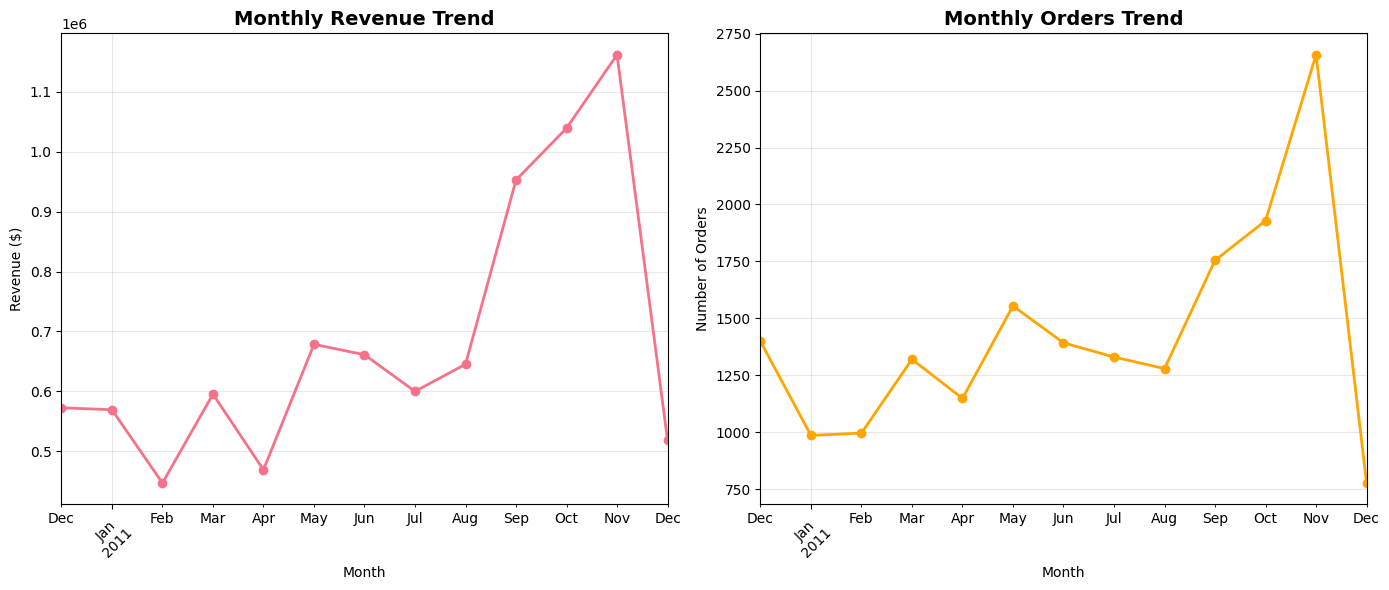

In [9]:
# Plot monthly revenue trend
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
monthly_revenue = df.groupby('YearMonth')['TotalAmount'].sum()
monthly_revenue.plot(kind='line', marker='o', linewidth=2)
plt.title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
monthly_orders = df.groupby('YearMonth')['InvoiceNo'].nunique()
monthly_orders.plot(kind='line', marker='o', color='orange', linewidth=2)
plt.title('Monthly Orders Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Customer Purchase Patterns

In [10]:
# Customer-level statistics
customer_stats = df.groupby('CustomerID').agg({
    'InvoiceDate': ['min', 'max', 'nunique'],
    'TotalAmount': ['sum', 'mean', 'count'],
    'Quantity': 'sum'
}).round(2)

# Flatten column names
customer_stats.columns = ['First_Purchase', 'Last_Purchase', 'Order_Frequency',
                         'Total_Spent', 'Avg_Order_Value', 'Total_Items',
                         'Total_Orders']

print("="*50)
print("Customer Statistics Summary")
print("="*50)
print(customer_stats.describe())

Customer Statistics Summary
                      First_Purchase                  Last_Purchase  \
count                           4338                           4338   
mean   2011-04-30 17:06:50.857538048  2011-09-08 11:38:59.045643008   
min              2010-12-01 08:26:00            2010-12-01 09:53:00   
25%              2011-01-17 11:13:15            2011-07-20 19:18:00   
50%              2011-04-05 09:52:30            2011-10-20 10:40:30   
75%              2011-08-19 10:11:30            2011-11-22 11:05:45   
max              2011-12-09 12:16:00            2011-12-09 12:50:00   
std                              NaN                            NaN   

       Order_Frequency    Total_Spent  Avg_Order_Value  Total_Items  \
count      4338.000000    4338.000000      4338.000000  4338.000000   
mean          4.250807    2054.266459        68.350452    91.720609   
min           1.000000       3.750000         2.100000     1.000000   
25%           1.000000     307.415000        12.

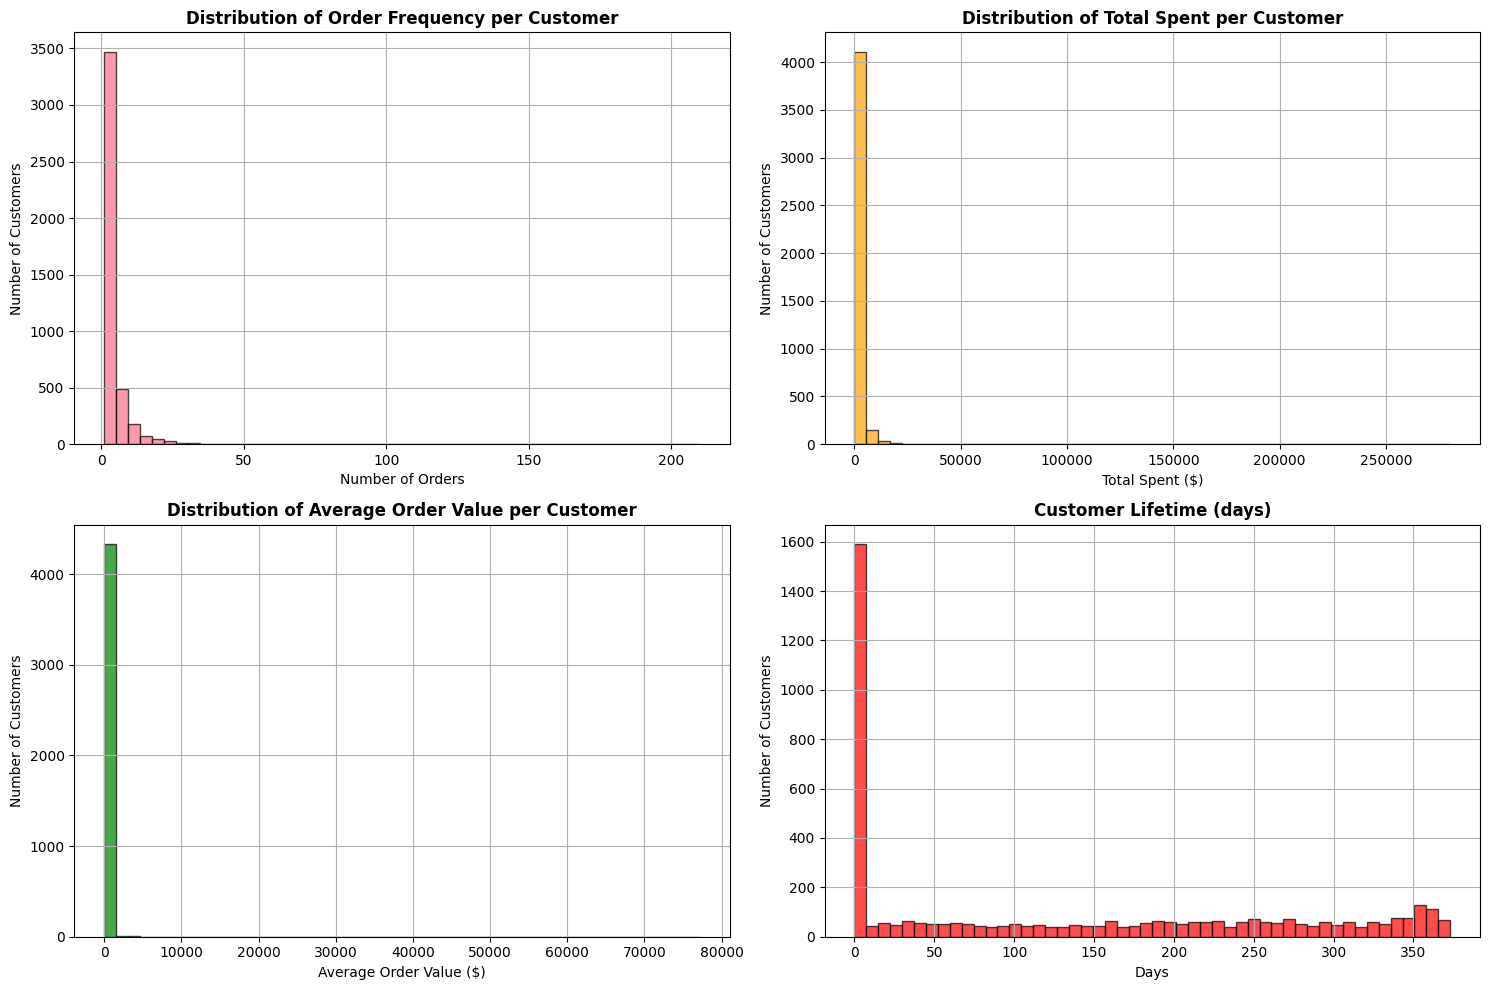

In [11]:
# Customer purchase distribution
plt.figure(figsize=(15, 10))

# Order frequency distribution
plt.subplot(2, 2, 1)
customer_stats['Order_Frequency'].hist(bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Order Frequency per Customer', fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

# Total spent distribution
plt.subplot(2, 2, 2)
customer_stats['Total_Spent'].hist(bins=50, edgecolor='black', alpha=0.7, color='orange')
plt.title('Distribution of Total Spent per Customer', fontweight='bold')
plt.xlabel('Total Spent ($)')
plt.ylabel('Number of Customers')

# Average order value distribution
plt.subplot(2, 2, 3)
customer_stats['Avg_Order_Value'].hist(bins=50, edgecolor='black', alpha=0.7, color='green')
plt.title('Distribution of Average Order Value per Customer', fontweight='bold')
plt.xlabel('Average Order Value ($)')
plt.ylabel('Number of Customers')

# Customer lifetime (days between first and last purchase)
customer_stats['Customer_Lifetime'] = (customer_stats['Last_Purchase'] - customer_stats['First_Purchase']).dt.days
plt.subplot(2, 2, 4)
customer_stats['Customer_Lifetime'].hist(bins=50, edgecolor='black', alpha=0.7, color='red')
plt.title('Customer Lifetime (days)', fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

## 5. RFM Analysis (Recency, Frequency, Monetary)

In [12]:
# Calculate RFM metrics
# Reference date for recency calculation (latest date in dataset + 1 day)
reference_date = pd.to_datetime(max_date) + pd.Timedelta(days=1)

# Calculate RFM for each customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalAmount': 'sum'  # Monetary
}).round(2)

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

print("="*50)
print("RFM Analysis")
print("="*50)
print(rfm.describe())

RFM Analysis
           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     92.059474     4.272015    2054.266459
std     100.012264     7.697998    8989.230441
min       0.000000     1.000000       3.750000
25%      17.000000     1.000000     307.415000
50%      50.000000     2.000000     674.485000
75%     141.750000     5.000000    1661.740000
max     373.000000   209.000000  280206.020000


In [13]:
# Create RFM quartiles
# Lower recency is better, so we need to reverse the quartile calculation
rfm['R_Quartile'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Quartile'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Quartile'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Create RFM Score
rfm['RFM_Score'] = rfm['R_Quartile'].astype(int) + rfm['F_Quartile'].astype(int) + rfm['M_Quartile'].astype(int)

print("\nRFM Quartiles (first 10 customers):")
print(rfm.head(10))


RFM Quartiles (first 10 customers):
            Recency  Frequency  Monetary R_Quartile F_Quartile M_Quartile  \
CustomerID                                                                  
12346.0         325          1  77183.60          1          1          5   
12347.0           2          7   4310.00          5          5          5   
12348.0          75          4   1797.24          2          4          4   
12349.0          18          1   1757.55          4          1          4   
12350.0         310          1    334.40          1          1          2   
12352.0          36          8   2506.04          3          5          5   
12353.0         204          1     89.00          1          1          1   
12354.0         232          1   1079.40          1          1          4   
12355.0         214          1    459.40          1          1          2   
12356.0          22          3   2811.43          4          3          5   

            RFM_Score  
CustomerID    

In [14]:
# Create RFM segments based on RFM Score
def segment_customers(row):
    if row['RFM_Score'] >= 13:
        return 'Champions'
    elif row['RFM_Score'] >= 11:
        return 'Loyal Customers'
    elif row['RFM_Score'] >= 9:
        return 'Potential Loyalists'
    elif row['RFM_Score'] >= 7:
        return 'New Customers'
    elif row['RFM_Score'] >= 5:
        return 'Promising'
    else:
        return 'Lost'

rfm['Segment'] = rfm.apply(segment_customers, axis=1)

# Count customers in each segment
segment_counts = rfm['Segment'].value_counts()
segment_percent = (segment_counts / len(rfm) * 100).round(2)

print("\n" + "="*50)
print("RFM Customer Segments")
print("="*50)

segment_df = pd.DataFrame({
    'Count': segment_counts,
    'Percentage': segment_percent
})
print(segment_df)


RFM Customer Segments
                     Count  Percentage
Segment                               
Champions              932       21.48
Promising              761       17.54
New Customers          760       17.52
Potential Loyalists    676       15.58
Loyal Customers        663       15.28
Lost                   546       12.59


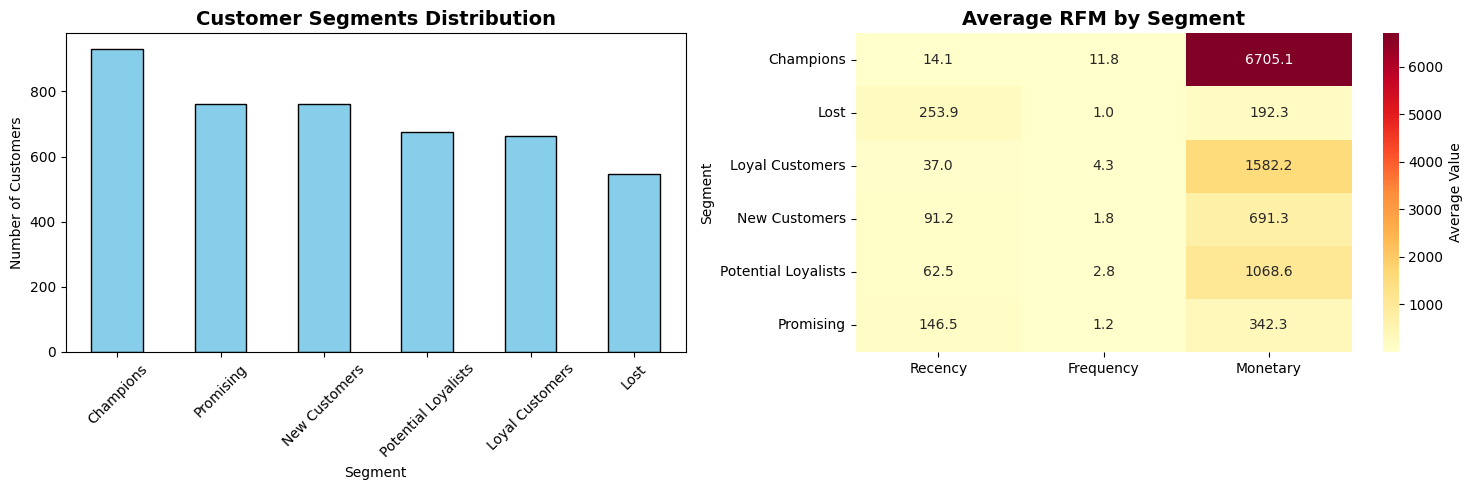

In [15]:
# Visualize RFM segments
plt.figure(figsize=(15, 5))

# Segment distribution
plt.subplot(1, 2, 1)
segment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Customer Segments Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# RFM distribution heatmap
plt.subplot(1, 2, 2)
# Average RFM values by segment
segment_rfm = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean()
sns.heatmap(segment_rfm, annot=True, cmap='YlOrRd', fmt='.1f', cbar_kws={'label': 'Average Value'})
plt.title('Average RFM by Segment', fontsize=14, fontweight='bold')
plt.ylabel('Segment')

plt.tight_layout()
plt.show()

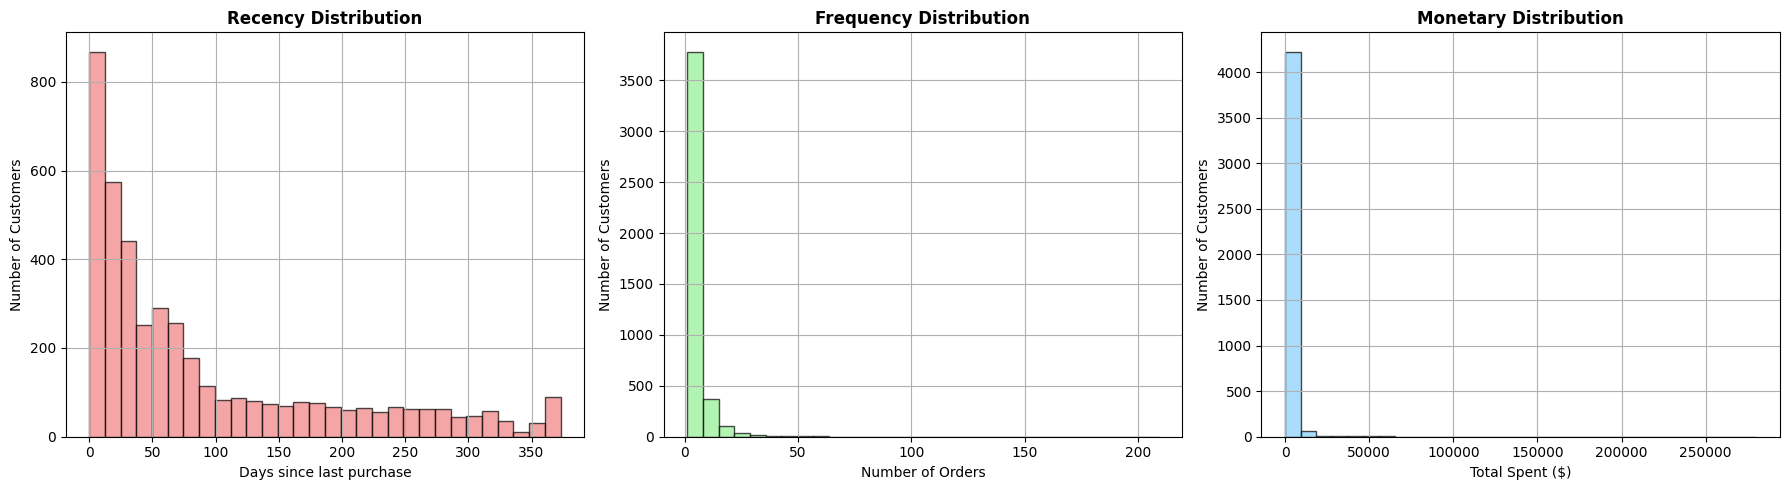

In [16]:
# RFM distribution plots
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
rfm['Recency'].hist(bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
plt.title('Recency Distribution', fontweight='bold')
plt.xlabel('Days since last purchase')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 2)
rfm['Frequency'].hist(bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Frequency Distribution', fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 3)
rfm['Monetary'].hist(bins=30, edgecolor='black', alpha=0.7, color='lightskyblue')
plt.title('Monetary Distribution', fontweight='bold')
plt.xlabel('Total Spent ($)')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

## 6. Export Clean Dataset

In [17]:
# Create a clean dataset for causal inference
# Select relevant columns: CustomerID, Date, TotalAmount

# Create daily customer summary
daily_customer = df.groupby(['CustomerID', 'Date']).agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

# Rename columns for clarity
daily_customer.columns = ['CustomerID', 'Date', 'PurchaseAmount', 'TotalQuantity', 'OrderCount']

print("="*50)
print("Export Clean Dataset")
print("="*50)
print(f"Daily customer data shape: {daily_customer.shape}")
print(f"\nFirst few rows:")
print(daily_customer.head(10))

print(f"\nDate range: {daily_customer['Date'].min()} to {daily_customer['Date'].max()}")
print(f"Total customers: {daily_customer['CustomerID'].nunique():,}")
print(f"Total customer-days: {len(daily_customer):,}")

Export Clean Dataset
Daily customer data shape: (16763, 5)

First few rows:
   CustomerID        Date  PurchaseAmount  TotalQuantity  OrderCount
0     12346.0  2011-01-18        77183.60          74215           1
1     12347.0  2010-12-07          711.79            319           1
2     12347.0  2011-01-26          475.39            315           1
3     12347.0  2011-04-07          636.25            483           1
4     12347.0  2011-06-09          382.52            196           1
5     12347.0  2011-08-02          584.91            277           1
6     12347.0  2011-10-31         1294.32            676           1
7     12347.0  2011-12-07          224.82            192           1
8     12348.0  2010-12-16          892.80           1254           1
9     12348.0  2011-01-25          227.44            601           1

Date range: 2010-12-01 to 2011-12-09
Total customers: 4,338
Total customer-days: 16,763


In [18]:
# Save the clean dataset
output_path = '../data/processed/daily_customer_purchases.csv'
daily_customer.to_csv(output_path, index=False)
print(f"\nClean dataset saved to: {output_path}")

# Save RFM analysis results
rfm_output_path = '../data/processed/customer_rfm_analysis.csv'
rfm.to_csv(rfm_output_path)
print(f"RFM analysis saved to: {rfm_output_path}")

print("\n" + "="*50)
print("Analysis Complete!")
print("="*50)


Clean dataset saved to: ../data/processed/daily_customer_purchases.csv
RFM analysis saved to: ../data/processed/customer_rfm_analysis.csv

Analysis Complete!
